# The Adult Income Dataset
### A Machine Learning Analysis of USA Census Salary Data


#### The importance of census statistics :
The census is a special, wide-range activity, which takes place once a decade in the entire country. 
The purpose is to gather information about the general population, in order to present a full and reliable 
picture of the population in the country - its housing conditions and demographic, social and 
economic characteristics...

#### Objective of the Project :
The goal of this machine learning project is to predict whether a person makes over 50K a year or 
not given their demographic variation.
Source : https://archive.ics.uci.edu/ml/machine-learning-databases/adult/


age – The age of the individual

type_employer – The type of employer the individual has. Whether they are government, military, private, an d so on.

fnlwgt – The \# of people the census takers believe that observation represents. We will be ignoring this variable

education – The highest level of education achieved for that individual

education_num – Highest level of education in numerical form

marital – Marital status of the individual

occupation – The occupation of the individual

relationship – A bit more difficult to explain. Contains family relationship values like husband, father, and so on, but only contains one per observation. I’m not sure what this is supposed to represent

race – descriptions of the individuals race. Black, White, Eskimo, and so on

sex – Biological Sex

capital_gain – Capital gains recorded

capital_loss – Capital Losses recorded

hr_per_week – Hours worked per week

country – Country of origin for person

income – Boolean Variable. Whether or not the person makes more than \$50,000 per annum income.

In [136]:
#The income dataset was extracted from US Census database hosted on UCI’s Machine Learning Repository.
# aim : to predict whether the person makes <=50k or >50k per year
import pandas as pd
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [137]:
df.shape  # this dataset contains approx 32000 observations and 15 attributes

(32561, 15)

In [138]:
df.size  #this dataset contains 4lakh+ values

488415

In [139]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [140]:
df.info() # 9 object type and 6 int type variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [141]:
df.select_dtypes(['object']).columns.size

9

In [142]:
df.income.value_counts()  # approx 75% peoples income is <=50k

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [143]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [144]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [145]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [146]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [147]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [148]:
df.loc[::,(df == '?').any()].columns  # there are 3 variables contains '?' some values

Index(['workclass', 'occupation', 'native.country'], dtype='object')

In [149]:
import numpy as np
df = df.replace({'?' : np.NAN}) # replace '?' with NAN
df.isnull().sum() # now check their is null present or not

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

variable ['workclass','occupation','native.country'] having null values so we should replace them with another values


In [150]:
df['workclass']=df['workclass'].fillna('Private')
df['occupation']=df['occupation'].fillna('Other-service')
df['native.country']=df['native.country'].fillna('United-States')

In workclass var , private sector contains max numbers so we put private in place of null .


In occupation , prof-speciality are more but we put other-service instead of prof-speciality because other service will be more suitable.


In native.country , usa contains max obeservations so we should replace null values with usa

In [151]:
df.isnull().sum()  # no nulls are present 

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [152]:
educational_df=pd.DataFrame({'education':df['education'].unique(),'education_no':df['education.num'].unique()})
educational_df.sort_values('education_no',ascending = True)

,education,education_no
15,Preschool,1
11,1st-4th,2
12,5th-6th,3
2,7th-8th,4
14,9th,5
3,10th,6
8,11th,7
13,12th,8
0,HS-grad,9
1,Some-college,10


Education.num is clear seen replica in numerical of education column so we drop education column

In [153]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


 corr of final weight(fnlwgt) is very small hence drop fnlwgt

In [154]:
df.drop(['education','fnlwgt','relationship'],axis=1,inplace = True) # drop education and fnlwgt

In [155]:
# In chi2
# if porbability value is less than 5% then we reject the null hypothesis
# ho= there is no relation between given feature with dependent variable
# ha= there is relation between given feature with dependent variable

In [156]:
for cols in df.columns:
    if df[cols].dtype=='object':
        from scipy.stats import chi2_contingency
        chi_df=pd.crosstab(df[cols],df['income'])
        a,p_value,b,c=chi2_contingency(chi_df)
        if p_value < 0.05:
            print(f'{cols} has p_value of {p_value}')

workclass has p_value of 3.848177814824396e-195
marital.status has p_value of 0.0
occupation has p_value of 0.0
race has p_value of 2.305960610160958e-70
sex has p_value of 0.0
native.country has p_value of 8.005212705688595e-45
income has p_value of 0.0


hence all p_value is less tha 0.05 so the independent variabls having relationship between dependent variable

### Visualization

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='income'>

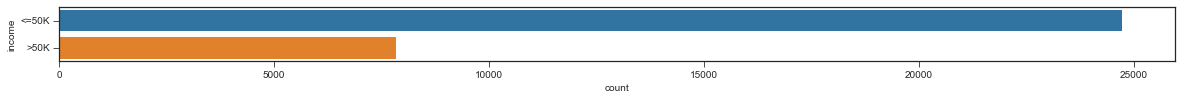

In [158]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=df)

 data is imbalanced

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

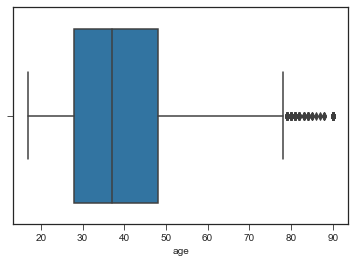

In [159]:
sns.boxplot(df['age'])  # outliers are present in age section

In [160]:
#df['capital.loss'].value_counts()

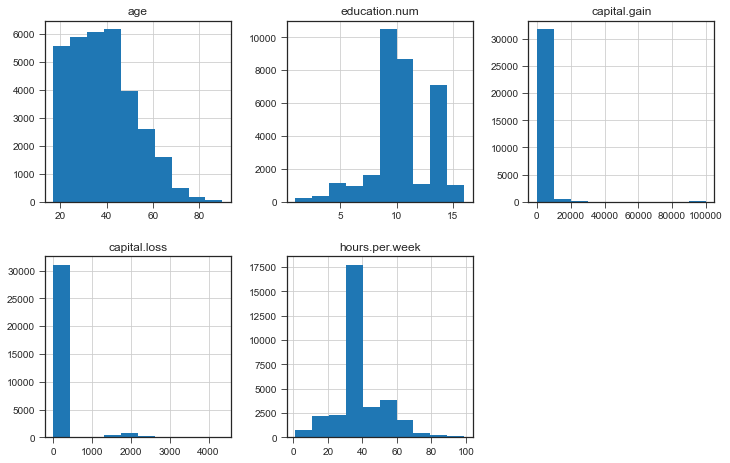

In [161]:
df.hist(figsize = (12,12) , layout=(3,3))
plt.show()

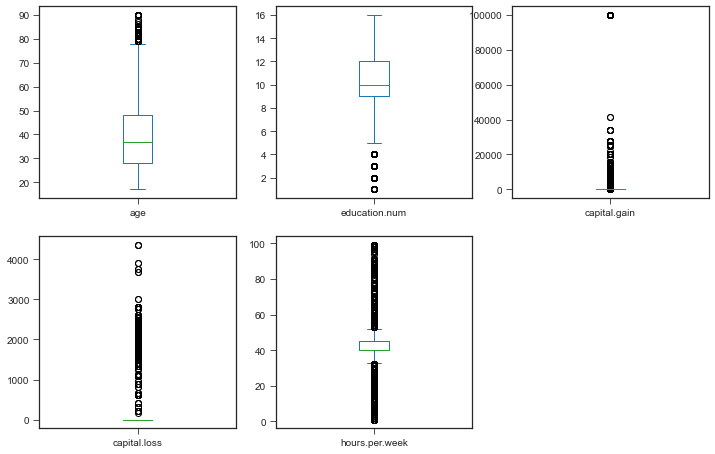

In [162]:
df.plot(kind = 'box',figsize = (12,12) , layout = (3,3) , sharex = False , subplots = True);

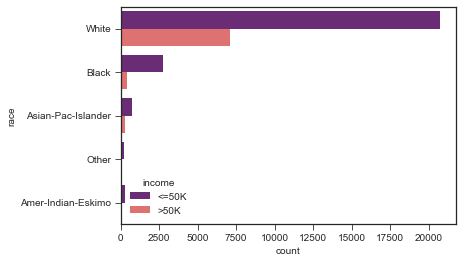

In [163]:
sns.countplot( y ='race' , hue = 'income' , data = df , palette = 'magma');

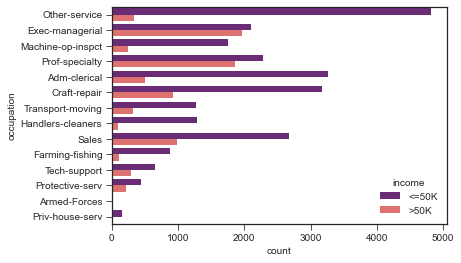

In [164]:
sns.countplot( y ='occupation' , hue = 'income' , data = df , palette = 'magma');

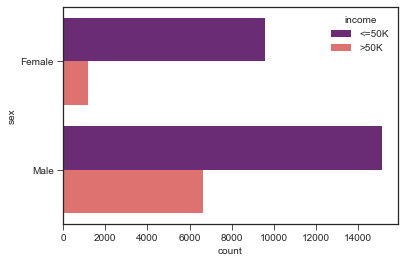

In [165]:
sns.countplot( y ='sex' , hue = 'income' , data = df , palette = 'magma');

In [166]:
df['hours.per.week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

In [167]:
# Removing outliers 
for cols in df.columns:
    if df[cols].dtype!='object':
        q1=df[cols].quantile(0.25)
        q3=df[cols].quantile(0.75)
        q2=q3-q1
        low=q1-(1.5*q2)
        high=q3+(1.5*q2)
        (df.loc[(df[cols]<low) | (df[cols]>high),cols])=df[cols].median()

In [168]:
df.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'native.country', 'income'],
      dtype='object')

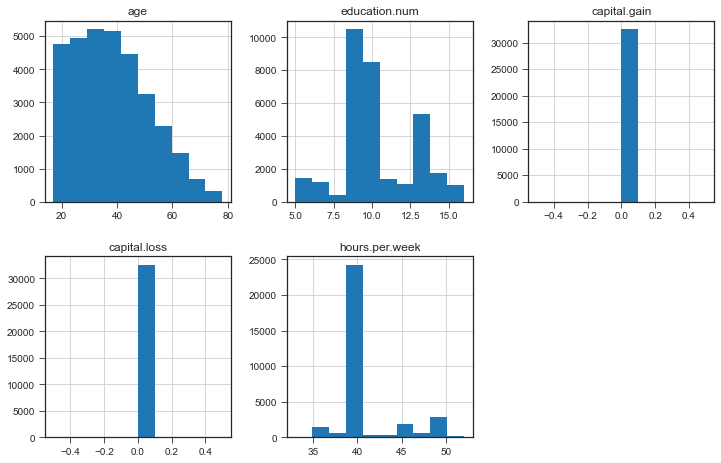

In [169]:
df.hist(figsize = (12,12) , layout=(3,3))
plt.show()

### categorical to numerical

In [170]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# short way of applying encoder
df[df.select_dtypes(include = ['object']).columns] = df[df.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [171]:
df.select_dtypes(['object']).columns  # hence no categorical variable are present

Index([], dtype='object')

In [172]:
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [173]:
for cols in df.columns:
    if df[cols].dtype != 'object':
        corr = df[cols].corr(df['income'])
        print(f'{cols} has correlation with income as {corr}')

age has correlation with income as 0.2424798637078326
workclass has correlation with income as 0.0026929737847159086
education.num has correlation with income as 0.34179946875826356
marital.status has correlation with income as -0.19930700917197428
occupation has correlation with income as 0.04438126016250517
race has correlation with income as 0.07184561147402381
sex has correlation with income as 0.21598015058403439
capital.gain has correlation with income as nan
capital.loss has correlation with income as nan
hours.per.week has correlation with income as 0.17700379951430137
native.country has correlation with income as 0.023058045028117913
income has correlation with income as 1.0


In [174]:
df.drop(['capital.gain','capital.loss'],axis=1,inplace = True) # drop capital.gain , capital.losssas it showed no corr between variables

# Model building

#### some rules
##### Accuracy : higher the accuracy better the model
##### TPR(recalll) : higher the recall better the model
##### FPR lower the fpr better the model
##### Precision : higher the precision better the model
##### F1 : Higher the F! better the model

In [175]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

The class distribution is then summarized, confirming a modest class imbalance with approximately 75 percent for the majority class (<=50K)

and approximately 25 percent for the minority class (>50K). we need to balanced the data so the accuracy would not be baised.

In [176]:
# we should apply straified sampling
from sklearn.model_selection import train_test_split
stratified_x = df.iloc[:,:-1]
stratified_y = df.iloc[:,[-1]]
train_X , test_X , train_y , test_y = train_test_split(stratified_x ,stratified_y , test_size=0.20 , stratify=stratified_y,random_state = 0)

In [177]:
train_X.shape

(26048, 9)

In [178]:
test_y.shape

(6513, 1)

In [179]:
train_y = np.ravel(train_y, order='C')

In [180]:
train_y.shape

(26048,)

In [181]:
train_X.head()

,age,workclass,education.num,marital.status,occupation,race,sex,hours.per.week,native.country
29335,55,3,10,0,12,4,0,40,38
12007,46,3,9,2,10,4,1,40,38
10864,20,3,10,4,0,4,0,40,38
3762,40,3,13,4,0,2,0,40,38
12086,30,6,6,2,0,4,1,40,38


In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)

In [183]:
train_X.std()

1.0

In [184]:
train_X.mean()

1.3123848475639989e-17

In [185]:
test_X.std()

0.9999999999999999

In [186]:
test_X.mean()

7.079123081766356e-17

In [187]:
#### std = 1 and mean = 0 it means my data is succefully standardised 

## Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X , train_y)

LogisticRegression()

In [189]:
pred_y = lr.predict(test_X)

In [190]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score,roc_auc_score,f1_score,recall_score
confusion_matrix(test_y , pred_y)

array([[4636,  309],
       [ 954,  614]], dtype=int64)

In [191]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8060801473975127
precision: 0.6652221018418202
roc_curve: 0.6645471358411918
f1_score: 0.4929747089522281


In [192]:
roc_auc_score(test_y , pred_y)

0.6645471358411918

In [193]:
fpr = 603/(603+564)
fpr

0.5167095115681234

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4945
           1       0.67      0.39      0.49      1568

    accuracy                           0.81      6513
   macro avg       0.75      0.66      0.69      6513
weighted avg       0.79      0.81      0.79      6513



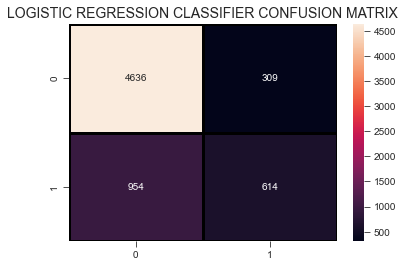

In [194]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [195]:
# CV of logisitic regression
lr_grid={'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'penalty':['elasticnet', 'l1', 'l2']  }
from sklearn.model_selection import GridSearchCV
grid_lr = GridSearchCV(lr , lr_grid)
grid_lr.fit(train_X , train_y);

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErro

In [196]:
grid_lr.best_params_

{'penalty': 'l1', 'solver': 'saga'}

In [197]:
lr = LogisticRegression(penalty =  'l1', solver = 'saga')
lr.fit(train_X, train_y)
pred_y = lr.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[4636,  309],
       [ 954,  614]], dtype=int64)

In [198]:
print(accuracy_score(test_y , pred_y))
print(precision_score(test_y , pred_y))

0.8060801473975127
0.6652221018418202


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4945
           1       0.67      0.39      0.49      1568

    accuracy                           0.81      6513
   macro avg       0.75      0.66      0.69      6513
weighted avg       0.79      0.81      0.79      6513



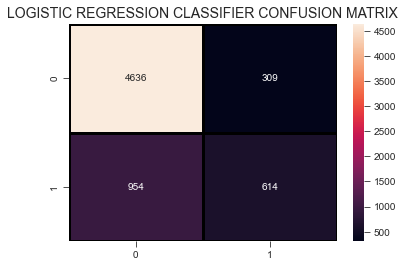

In [199]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

## KNN Classifier

In [200]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_X , train_y)
pred_y = knn.predict(test_X)

In [201]:
confusion_matrix(test_y , pred_y)

array([[4423,  522],
       [ 678,  890]], dtype=int64)

In [202]:
accuracy_score(test_y , pred_y)

0.8157531091662829

In [203]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8157531091662829
precision: 0.6303116147308782
roc_curve: 0.7310204339572026
f1_score: 0.5973154362416107


              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4945
           1       0.63      0.57      0.60      1568

    accuracy                           0.82      6513
   macro avg       0.75      0.73      0.74      6513
weighted avg       0.81      0.82      0.81      6513



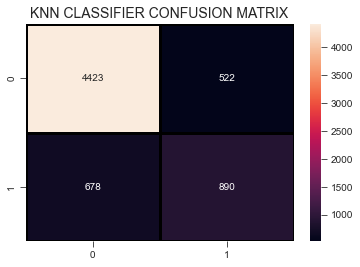

In [204]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [205]:
# Cross Validation
parameter_dict={'n_neighbors':[1,11,21,31,41,51,75,101]}
from sklearn.model_selection import GridSearchCV
grid_df=GridSearchCV(knn,param_grid=parameter_dict)
grid_df.fit(train_X , train_y)
grid_df.best_params_

{'n_neighbors': 41}

In [206]:
knn=KNeighborsClassifier(n_neighbors=41,weights='distance')
knn.fit(train_X , train_y)
pred_y = knn.predict(test_X)
a = confusion_matrix(test_y , pred_y)
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('Confusion :',a)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

Confusion : [[4524  421]
 [ 708  860]]
accuracy : 0.826654383540611
precision: 0.6713505074160812
roc_curve: 0.7316664431192093
f1_score: 0.6037206037206038


              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4945
           1       0.67      0.55      0.60      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.73      0.75      6513
weighted avg       0.82      0.83      0.82      6513



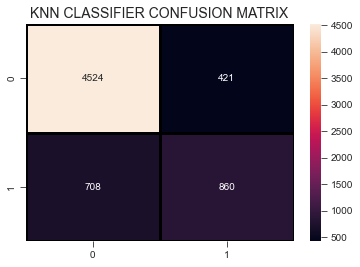

In [207]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

## Decision Tree 

In [208]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_X , train_y)
pred_y=dt.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[4302,  643],
       [ 761,  807]], dtype=int64)

In [209]:
accuracy_score(test_y , pred_y)

0.7844311377245509

In [210]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.7844311377245509
precision: 0.5565517241379311
roc_curve: 0.6923190168382823
f1_score: 0.5347912524850895


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4945
           1       0.56      0.51      0.53      1568

    accuracy                           0.78      6513
   macro avg       0.70      0.69      0.70      6513
weighted avg       0.78      0.78      0.78      6513



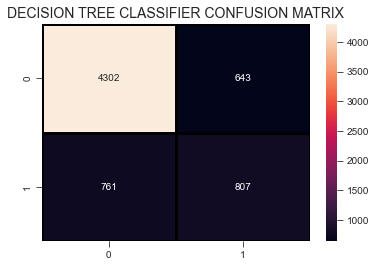

In [211]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DECISION TREE CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [212]:
# Cross Validation
parameter_dict={'criterion':['gini','entropy'],'max_depth':[1,30,4],
    'min_samples_split':[1,2,3,4,5]}
grid_model=GridSearchCV(dt,param_grid=parameter_dict)
grid_model.fit(train_X , train_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 30, 4],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [213]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [214]:
dt_grid=dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_split= 2)

In [240]:
dt_grid.fit(train_X, train_y)
pred_y=dt_grid.predict(test_X)
confusion_matrix(test_y,y_pred_dt_grid)

array([[4690,  255],
       [ 924,  644]], dtype=int64)

In [241]:
accuracy_score(test_y,pred_y)

0.8189774297558728

In [242]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8189774297558728
precision: 0.7163515016685206
roc_curve: 0.6795735230391449
f1_score: 0.5220916092419943


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4945
           1       0.56      0.51      0.53      1568

    accuracy                           0.78      6513
   macro avg       0.70      0.69      0.70      6513
weighted avg       0.78      0.78      0.78      6513



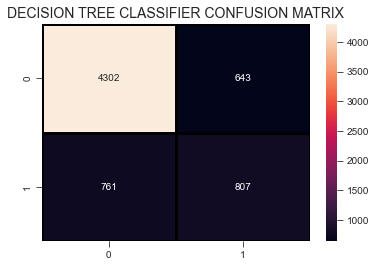

In [218]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DECISION TREE CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

### Bagging Classifier

In [219]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier( n_estimators=100,bootstrap=True,oob_score=True,random_state=42)
bg.fit(train_X , train_y)
y_pred_bagg=bg.predict(test_X)
confusion_matrix(test_y,y_pred_bagg)

array([[4384,  561],
       [ 694,  874]], dtype=int64)

In [220]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.7844311377245509
precision: 0.5565517241379311
roc_curve: 0.6923190168382823
f1_score: 0.5347912524850895


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4945
           1       0.56      0.51      0.53      1568

    accuracy                           0.78      6513
   macro avg       0.70      0.69      0.70      6513
weighted avg       0.78      0.78      0.78      6513



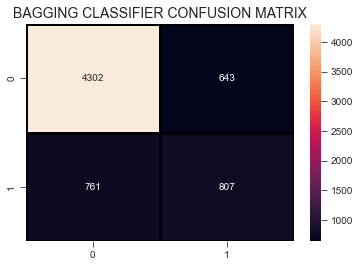

In [221]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("BAGGING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [222]:
# Cross Validation
from sklearn.model_selection import GridSearchCV
param_grid_bagging = {'n_estimators':list(range(1,100,10))}
grid = GridSearchCV(bg , param_grid=param_grid_bagging)
grid.fit(train_X , train_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This prob

GridSearchCV(estimator=BaggingClassifier(n_estimators=100, oob_score=True,
                                         random_state=42),
             param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91]})

In [223]:
grid.best_params_

{'n_estimators': 31}

In [224]:
bg = BaggingClassifier(n_estimators=31 , bootstrap=True , oob_score=True)
bg.fit(train_X , train_y)
pred_y = bg.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[4368,  577],
       [ 705,  863]], dtype=int64)

In [225]:
accuracy_score(test_y , pred_y)

0.8031629049593122

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4945
           1       0.60      0.55      0.57      1568

    accuracy                           0.80      6513
   macro avg       0.73      0.72      0.72      6513
weighted avg       0.80      0.80      0.80      6513



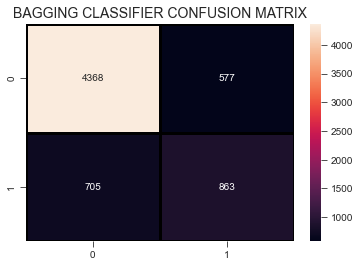

In [226]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("BAGGING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

### Random Classifier

In [227]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_X , train_y)
pred_y = rf.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[4404,  541],
       [ 701,  867]], dtype=int64)

In [228]:
accuracy_score(test_y , pred_y)

0.8093044679871028

In [229]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8093044679871028
precision: 0.6157670454545454
roc_curve: 0.721765117826706
f1_score: 0.5826612903225806


              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4945
           1       0.62      0.55      0.58      1568

    accuracy                           0.81      6513
   macro avg       0.74      0.72      0.73      6513
weighted avg       0.80      0.81      0.81      6513



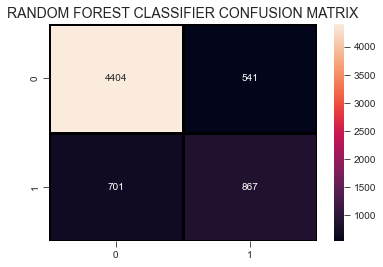

In [230]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

### SVM

In [231]:
from sklearn.svm import SVC
svm= SVC(degree=4)
svm.fit(train_X , train_y)
y_pred_svm=svm.predict(test_X)
w = accuracy_score(test_y ,y_pred_svm)
x = precision_score(test_y , y_pred_svm)
y = roc_auc_score(test_y , y_pred_svm)
z = f1_score(test_y ,y_pred_svm)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8197451251343467
precision: 0.7030927835051546
roc_curve: 0.6883541662367677
f1_score: 0.537431048069346


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4945
           1       0.70      0.43      0.54      1568

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.71      6513
weighted avg       0.81      0.82      0.80      6513



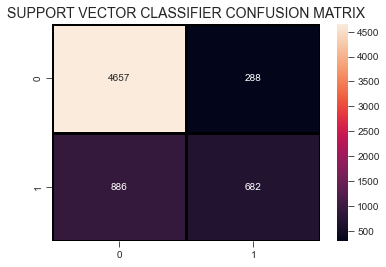

In [232]:
from sklearn.metrics import classification_report
print(classification_report(test_y , y_pred_svm))
sns.heatmap(confusion_matrix(test_y , y_pred_svm),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

### Voting classifier

In [233]:
lr=LogisticRegression(random_state=42)
knn=KNeighborsClassifier(n_neighbors=41,weights='distance')
dt_grid=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_split= 2,random_state=42)
rf=RandomForestClassifier(n_estimators=100,criterion= 'gini', max_depth= 4, min_samples_split= 2,random_state=42)
bg=BaggingClassifier( n_estimators=100,bootstrap=True,oob_score=True,random_state=42)

In [234]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier([('knn',knn),('dt',dt_grid),('rf',rf),('bg',bg)],voting='hard',n_jobs=5)
voting_clf.fit(train_X , train_y)
y_pred_voting_clf=voting_clf.predict(test_X)
confusion_matrix(test_y,y_pred_voting_clf)

array([[4737,  208],
       [ 966,  602]], dtype=int64)

In [235]:
w = accuracy_score(test_y ,y_pred_voting_clf)
x = precision_score(test_y , y_pred_voting_clf)
y = roc_auc_score(test_y , y_pred_voting_clf)
z = f1_score(test_y ,y_pred_voting_clf)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8197451251343467
precision: 0.7432098765432099
roc_curve: 0.6709329409215659
f1_score: 0.5063078216989066


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4945
           1       0.74      0.38      0.51      1568

    accuracy                           0.82      6513
   macro avg       0.79      0.67      0.70      6513
weighted avg       0.81      0.82      0.80      6513



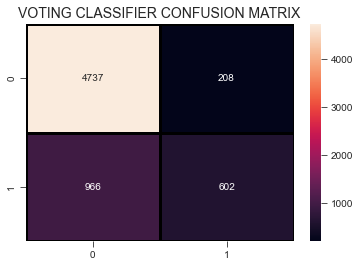

In [236]:
from sklearn.metrics import classification_report
print(classification_report(test_y , y_pred_voting_clf))
sns.heatmap(confusion_matrix(test_y , y_pred_voting_clf),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("VOTING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

## XGBOOST CLASSIFIER

In [237]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_X , train_y)
pred_y = xgb.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[4522,  423],
       [ 633,  935]], dtype=int64)

In [238]:
935/(935+432)

0.6839795171909291

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4945
           1       0.69      0.60      0.64      1568

    accuracy                           0.84      6513
   macro avg       0.78      0.76      0.77      6513
weighted avg       0.83      0.84      0.83      6513



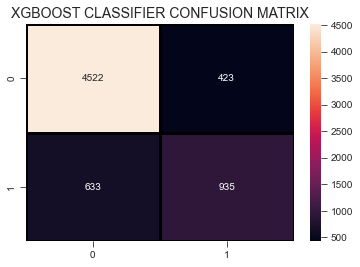

In [239]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBOOST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

### CONCLUSION : XGBOOST Classifier shows Highest Accuracy , Precision and F1score , so we should go with XGBOOST CLASSIFIER MODEL